Data Science Project
Zomato Bangalore Restaurants - Data Analysis & Predictive Modeling

Project Prepared by: Diaa Aldein Alsayed Ibrahim Osman

Prepared for: Epsilon AI Institute

Background:
Zomato, founded in 2008, is a global restaurant aggregator and food delivery company. In the context of Bangalore, the IT capital of India, where the restaurant industry continues to grow, this project aims to leverage the Zomato Bangalore Restaurants dataset from Kaggle. The study will provide valuable insights into the factors influencing the establishment of different types of restaurants.

Project Overview:
The objective of this data science project is to conduct a comprehensive analysis of Zomato Bangalore Restaurants and develop a predictive model for determining the success of new restaurants. Leveraging advanced data analytics and machine learning techniques, this project aims to provide actionable insights to restaurant owners, investors, and decision-makers.

# Step 2: Data Analysis 

### The main objectives of this analysis are:
## **1. Statistical analysis:** 
   - Explore important numerical and categorical features statistics in the data sets.

## **2. Correlation & Correlation Heatmap:** 
   - To uncover correlations between features and the extent of their relationships.
       
## **3. Analysis and visualization around the following questions:**
 
   ### - Univariate analysis:
      1. What are the highest frequently occurring sub-categorical features in terms of highest count or ratio?
      2. What is the statistical description for numerical features?
   ### - Bivariate analysis:
       * Considering that rates and votes ratios are indicative of the success and popularity of each brand, where rates reflect customer perception of service quality relative to price, indicating customer satisfaction, and votes ratios indicate brand popularity likely influenced by effective marketing strategies. Higher votes and rates suggest benchmarks for new restaurants, emphasizing serviceability and marketing strategies, among other factors like location and accessibility. 
       * Based on the above, the questions will focus on the impact of each feature on the ratios of rates and votes like:
      1. What is the impact of each sub-feature on rates and votes ratios?
      
## **4. Analysis outcomes or summary: **
   - Summarizing all the above steps outcomes as markdown.


# Step 2: Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# loading the dataset.
df = pd.read_csv("../data/processed/cleaned_data.csv")

## Data exploration & understanding

In [3]:
# Geitting Information about the Data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41202 entries, 0 to 41201
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   address                     41202 non-null  object 
 1   name                        41202 non-null  object 
 2   online_order                41202 non-null  int64  
 3   book_table                  41202 non-null  int64  
 4   rate                        41202 non-null  float64
 5   votes                       41202 non-null  int64  
 6   location                    41202 non-null  object 
 7   rest_type                   41202 non-null  object 
 8   cuisines                    41202 non-null  object 
 9   approx_cost_for_two_people  41202 non-null  int64  
 10  listed_in_type              41202 non-null  object 
 11  listed_in_city              41202 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 3.8+ MB


In [4]:
#checking for duplication in data 
df.duplicated().sum()

0

In [5]:
# veiwing the head of the data the first 5 rows  
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Italian, Mexican",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"North Indian, South Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


## 1. Statistical analysis:

In [6]:
# statistcal description for numeric features
round(df.describe(),2)

,online_order,book_table,rate,votes,approx_cost_for_two_people
count,41202.00,41202.00,41202.00,41202.00,41202.0
mean,0.66,0.15,3.68,351.97,603.5
std,0.47,0.36,0.45,883.35,464.6
min,0.00,0.00,1.80,0.00,40.0
25%,0.00,0.00,3.40,21.00,300.0
50%,1.00,0.00,3.70,73.00,500.0
75%,1.00,0.00,4.00,277.00,750.0
max,1.00,1.00,4.90,16832.00,6000.0


In [7]:
# statistcal description for categorical features
df.describe(include="O")

,address,name,location,rest_type,cuisines,listed_in_type,listed_in_city
count,41202,41202,41202,41202,41202,41202,41202
unique,8784,6574,92,66,1688,7,30
top,Delivery Only,Cafe Coffee Day,BTM,Quick Bites,"Chinese, North Indian",Delivery,BTM
freq,86,86,3873,13866,2284,20410,2578


* **First Statistical Description for Numeric Features:** 

    1. **online_order:** Ranges from **0** to **1**, referring to No and Yes. The mean of online order is **0.66**, indicating that **66%** of **41,190** restaurants have online order service. 

    2. **book_table:** Ranges from **0** to **1**, referring to No and Yes. The mean is **0.15**, indicating that **15%** of **41,190** restaurants have a book_table service. 

    3. **rate:** Ranges from **1.80** to **4.90**. The mean rate is **3.68**, and the median is **3.70**. As the mean is slightly less than the median, it reflects that the data is left-skewed, and there are some outliers in the lower rate values.
        
    4. **votes:** Ranges from **0** to **16,832**. The mean votes is **352.07**, and the median is **73**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper votes values.
    
    5. **approx_cost_for_two_people:** Ranges from **40** to **6,000**. The mean price is **603.55**, and the median is **500**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper prices values.
    
---

* **Second Statistical Description for Categorical Features:**
    1. **address Feature:** Out of **8,784** restaurant address, the most frequented name is **Delivery Only**, which has **86** values out of total restaurants address.

    2. **name Feature:** Out of **6,574** restaurant names, the most frequented name is **Cafe Coffee Day**, which has **86** branches out of total restaurants names.

    3. **location Feature:** Out of **92** locations, the most frequented location is **BTM**, which has **3,873** restaurants out of the total restaurants.

    4. **rest_type Feature:** Out of **66** rest_types, the most frequented rest_type is **Quick Bites**, which is repeated **13,861** times out of the total.

    5. **cuisines Feature:** Out of **1,688**, the most frequented cuisine is **North Indian**, with **2,284** occurrences out of the total.

    6. **listed_in_type Feature:** Out of **7** listed_in(types), the most frequented is **Delivery**, with **20,406** occurrences out of the total.

    7. **listed_in_city Feature:** Out of **30** listed_in(cities), the most frequented is **BTM**, with **2,578** restaurants in BTM out of the total.


## 2. Correlation & Correlation Heatmap:

In [8]:
# Correlation show the relationship between features.
correlation_matrix = round(df.corr(),2)
correlation_matrix

,online_order,book_table,rate,votes,approx_cost_for_two_people
online_order,1.00,-0.05,0.07,-0.01,-0.18
book_table,-0.05,1.00,0.42,0.39,0.61
rate,0.07,0.42,1.00,0.42,0.38
votes,-0.01,0.39,0.42,1.00,0.37
approx_cost_for_two_people,-0.18,0.61,0.38,0.37,1.00


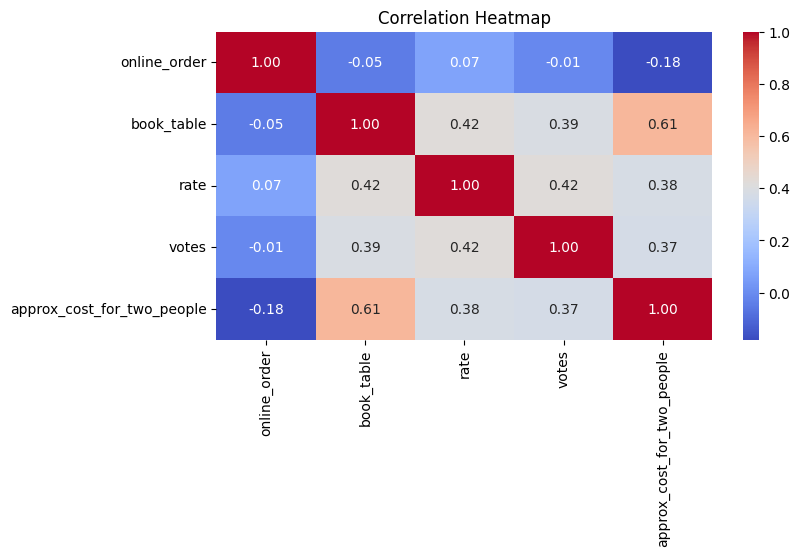

In [9]:
# heatmap visualize the correlation 
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis Summary

The correlation table reveals the relationships between various features in the dataset:

- Restaurants with **table booking** tend to have higher **costs** (strong positive correlation of 0.61).

- **Table booking** is moderately positively correlated with high **ratings** (0.42), suggesting that restaurants allowing table booking are more likely to have higher ratings.

- **Ratings** show a moderate positive correlation with the number of **votes** (0.42), indicating that highly-rated restaurants tend to have more votes & viseversa.

- **Table booking** is moderately positively correlated with **votes** (0.39), suggesting that restaurants allowing table booking are more likely to have higher votes.
  
- Moderate positive correlation (0.38) between Rating **(rate)** and **approx_cost_for_two_people**: Higher-rated restaurants might tend to have a slightly higher cost.
  
- Moderate positive correlation (0.37) between Votes **(votes)** and **approx_cost_for_two_people**: Popular restaurants might have a slightly higher cost.

- **Online ordering** has a weak negative correlation with **costs** (-0.18), indicating a slight tendency that restaurants offering online orders might have lower costs.

These correlations provide valuable insights for further analysis and modeling, helping identify potential predictors of restaurant success.

*Note: Correlation does not imply causation, and these interpretations are based on the observed associations in the data.*

## 3. Analysis and visualization
## - Univariant analysis:

In [10]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Chinese, Mughlai, North Indian",800,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Italian, Mexican",800,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"North Indian, South Indian",300,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### 1. What are the top 10 address in Bangalore with the highest concentration of restaurants activity?

In [11]:
top_address = df.address.value_counts().sort_values(ascending=False).head(10)
top_address

Delivery Only                                                  86
The Ritz-Carlton, 99, Residency Road, Bangalore                61
Conrad Bangalore, Kensington Road, Ulsoor, Bangalore           49
14th Main, 4th Sector, HSR, Bangalore                          47
1, 100 Feet Ring Road, 1st Phase, 2nd Stage, BTM, Bangalore    43
Citrus Hotels, 34, Cunningham Road, Bangalore                  41
710, Thubarahalli, Varthur Main Road, Whitefield, Bangalore    39
The Park Bangalore, 14/7, MG Road, Bangalore                   38
Radisson Blu, 1, Palace Road, Race Course Road, Bangalore      37
The Oberoi, 37-39, MG Road, Bangalore                          36
Name: address, dtype: int64

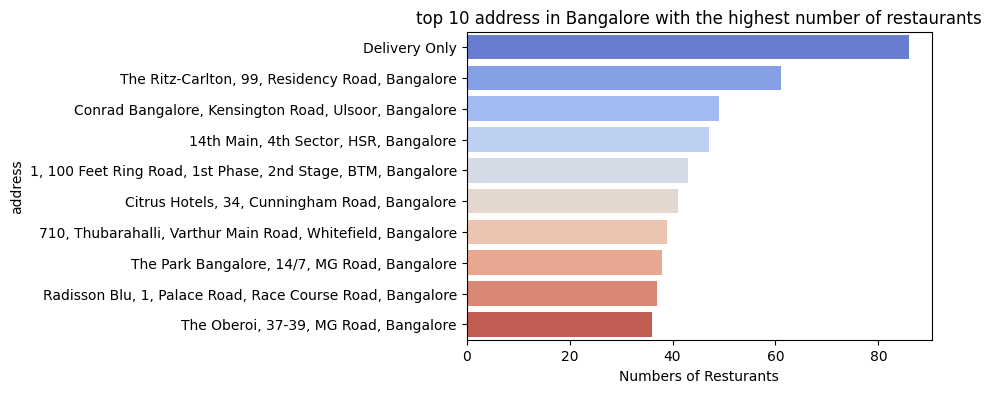

In [12]:
# Barplot chart Reflect the top 10 address in Bangalore with the highest number of restaurants.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_address.index, x=top_address.values, palette='coolwarm')
plt.ylabel('address')
plt.xlabel('Numbers of Resturants')
plt.title('top 10 address in Bangalore with the highest number of restaurants')
plt.show()

* The data highlights the busiest restaurant spots in Bangalore. "Delivery Only" tops with 86 occurrence, showing the popularity of food delivery. Upscale locations like The Ritz-Carlton and Conrad Bangalore are popular dining choices, while residential areas like HSR Layout and BTM have vibrant food scenes. Cunningham Road, Thubarahalli in Whitefield, and iconic MG Road with Park Bangalore, Radisson Blu, and Oberoi are also bustling with diverse food options.

### 2. What are the 20 largest restaurants or franchise in Bangalore in terms of number of branches or services?

In [13]:
Highest_restaurant_branches = df.name.value_counts().sort_values(ascending=False).head(20)
Highest_restaurant_branches

Cafe Coffee Day        86
Onesta                 85
Empire Restaurant      69
Five Star Chicken      68
Kanti Sweets           68
Just Bake              67
Baskin Robbins         62
KFC                    60
Pizza Hut              60
Petoo                  60
Smoor                  59
Subway                 59
McDonald's             59
Domino's Pizza         59
Polar Bear             58
Sweet Truth            58
Beijing Bites          56
Faasos                 56
Burger King            55
Smally's Resto Cafe    54
Name: name, dtype: int64

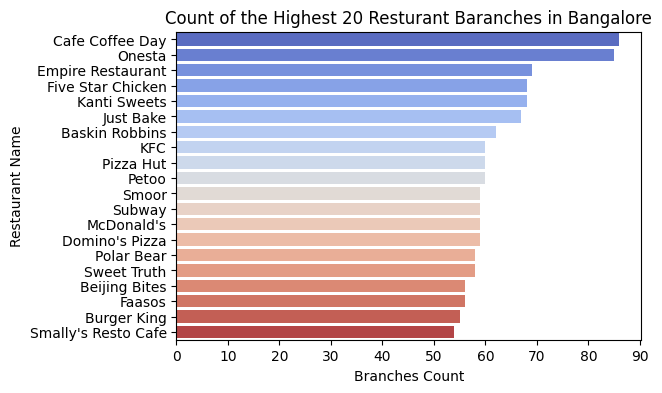

In [14]:
# Barplot chart Reflect the 20 largest restaurants or franchise in Bangalore in terms of number of branches.
plt.figure(figsize=(6, 4))
sns.barplot(y=Highest_restaurant_branches.index, x=Highest_restaurant_branches.values, palette='coolwarm')
plt.ylabel('Restaurant Name')
plt.xticks(range(0,100,10))
plt.xlabel('Branches Count')
plt.title('Count of the Highest 20 Resturant Baranches in Bangalore')
plt.show()

* The data reveals the top 20 restaurants in Bangalore with the highest numbers of branches. Cafe Coffee Day leads with 86 branches, followed by Onesta with 85 and Empire Restaurant with 69. This information provides insights into the widespread presence of these popular restaurants in the city.

### 3. What is the percent of resturant with online order to others?

In [15]:
online_order_ratio = round(df.online_order.value_counts()/len(df)*100,2)
online_order_ratio

1    65.66
0    34.34
Name: online_order, dtype: float64

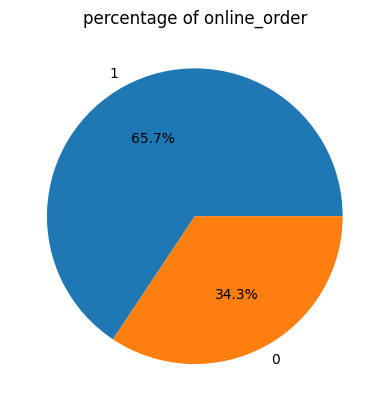

In [16]:
# pie chart show the percentage of online order
plt.pie(online_order_ratio, labels=online_order_ratio.index, autopct='%1.1f%%')
plt.title('percentage of online_order')
plt.show()

* From the above, it's observed that almost 66% of restaurants in Bangalore offer online ordering, while 34.3% of them do not.

### 4. What is the percent of resturant offers book_table service in Bangalore?

In [17]:
book_table_ratio = round(df.book_table.value_counts()/len(df)*100,2)
book_table_ratio

0    84.76
1    15.24
Name: book_table, dtype: float64

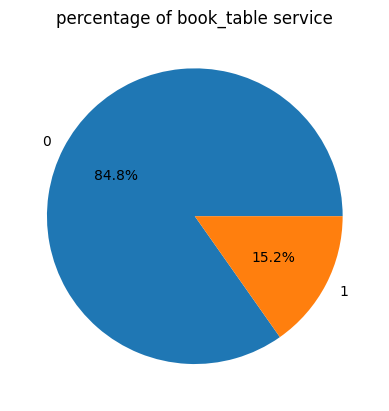

In [18]:
# pie chart show the percentage of book_table service
plt.pie(book_table_ratio, labels=book_table_ratio.index, autopct='%1.1f%%')
plt.title('percentage of book_table service')
plt.show()

* From the above, it is evident that only 15.2% of restaurants in Bangalore offer a table booking service, while 84.8% do not provide this service.

### 5. what is the mean rate and statistcal discription of the rate feature?

In [19]:
round(df.rate.describe(),2)

count    41202.00
mean         3.68
std          0.45
min          1.80
25%          3.40
50%          3.70
75%          4.00
max          4.90
Name: rate, dtype: float64

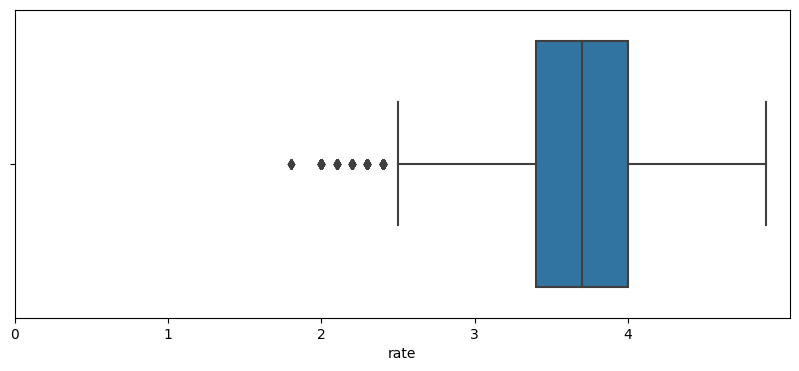

In [20]:
# boxplot for rate feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'rate')
plt.xticks(range(0,5,1))
plt.show()

**Rate Feature Statistical Description:**

The `rate` feature in the dataset reveals a generally moderate to high level of satisfaction, as indicated by a mean of approximately 3.68 and a standard deviation of around 0.45. The ratings range from 1.8 to 4.9, with a median of 3.7, suggesting a balanced distribution. The data is left-skewed, as the mean is slightly less than the median, and there are outliers in the lower-rated values. Overall, there is a concentration of ratings around the median, reflecting a generally positive sentiment among the restaurants in the dataset.


### 6. What is the mean votes and statistcal description of the votes feature?

In [21]:
round(df.votes.describe(),2)

count    41202.00
mean       351.97
std        883.35
min          0.00
25%         21.00
50%         73.00
75%        277.00
max      16832.00
Name: votes, dtype: float64

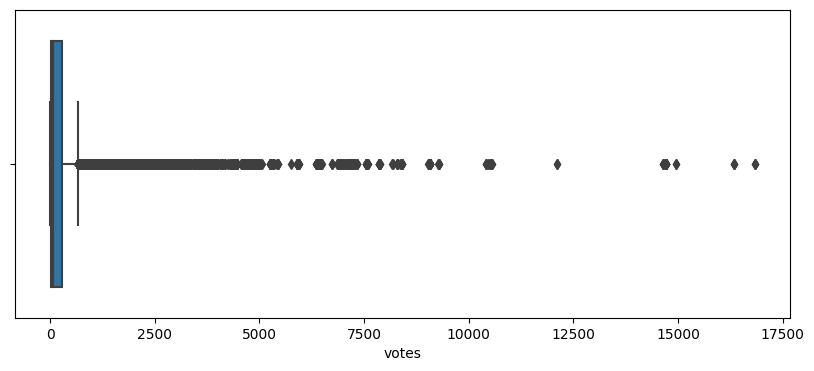

In [22]:
# boxplot for votes feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'votes')
plt.show()

**Votes Feature Statistical Description:**

The `votes` feature exhibits a right-skewed distribution, with a mean of approximately 352.07 and a standard deviation of 883.46. The data ranges from 0 to 16,832 votes, with a median of 73. The concentration of the data is noticeable in the lower quartiles (25% and 50%), suggesting that the majority of restaurants receive relatively fewer votes, while a small number of restaurants experience significantly higher voting activity.


### 7. What are the top 10 locations in Bangalore with the highest concentration of restaurants activity?

In [23]:
top_location = df.location.value_counts().sort_values(ascending=False).head(10)
top_location

BTM                      3873
Koramangala 5th Block    2295
HSR                      1992
Indiranagar              1795
JP Nagar                 1710
Jayanagar                1634
Whitefield               1568
Marathahalli             1407
Bannerghatta Road        1226
Koramangala 7th Block    1053
Name: location, dtype: int64

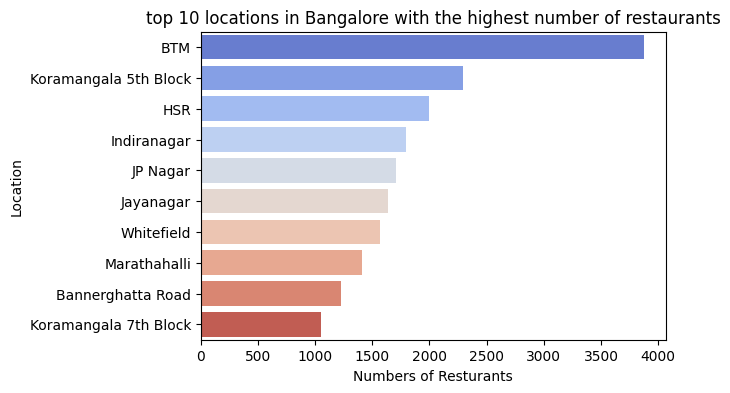

In [24]:
# Barplot chart Reflect the top 10 locations in Bangalore with the highest number of restaurants.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_location.index, x=top_location.values, palette='coolwarm')
plt.ylabel('Location')
plt.xlabel('Numbers of Resturants')
plt.title('top 10 locations in Bangalore with the highest number of restaurants')
plt.show()

* The data reveals the top 10 locations in Bangalore with the highest numbers of restaurants. BTM leads with 3873 establishments, followed by Koramangala 5th Block with 2295 and HSR with 1992. This information highlights the concentration of dining options in these areas.

### 8. What are the top 10 rest_type in Bangalore?

In [25]:
top_rest_type = df.rest_type.value_counts().sort_values(ascending=False).head(10)
top_rest_type

Quick Bites           13866
Casual Dining          9601
Cafe                   3365
Dessert Parlor         1848
Delivery               1666
Bar, Casual Dining     1468
Delivery, Takeaway     1276
Bakery                  704
Bar                     640
Beverage Shop           639
Name: rest_type, dtype: int64

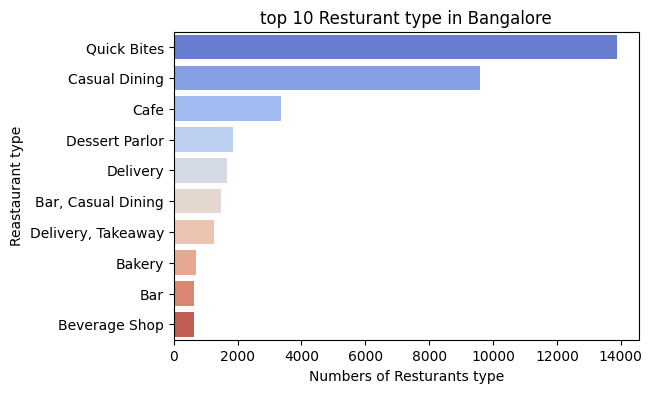

In [26]:
# Barplot chart Reflect the top 10 rest_type in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rest_type.index, x=top_rest_type.values, palette='coolwarm')
plt.ylabel('Reastaurant type')
plt.xlabel('Numbers of Resturants type')
plt.title('top 10 Resturant type in Bangalore')
plt.show()

* Bangalore, known for its hectic lifestyle and limited time for cooking, Quick Bites, Casual Dining, and Cafes dominate the restaurant scene, offering convenient options for the busy urban population. Dessert Parlors and Delivery services further cater to the fast-paced life, providing sweet indulgences and on-the-go meals.

### 9. What are the top 10 cuisines in Bangalore?

In [27]:
top_cuisines = df.cuisines.value_counts().sort_values(ascending=False).head(10)
top_cuisines

Chinese, North Indian                  2284
North Indian                           2107
South Indian                           1231
Chinese, North Indian, South Indian    1058
Bakery, Desserts                        777
Desserts, Ice Cream                     622
Cafe                                    620
Biryani                                 600
Biryani, Chinese, North Indian          550
Desserts                                545
Name: cuisines, dtype: int64

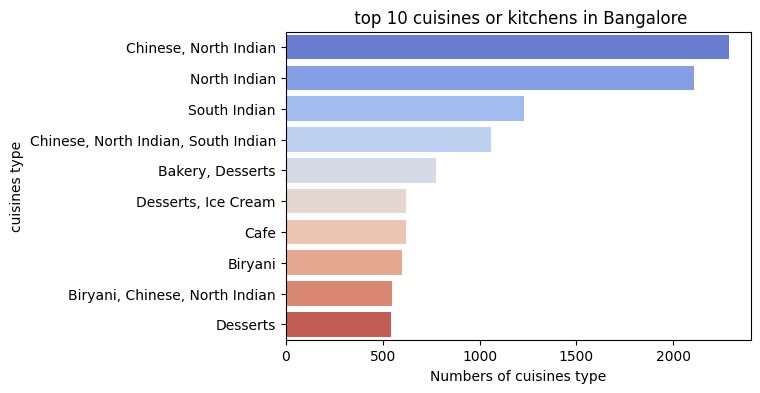

In [28]:
# Barplot chart Reflect the top 10 cuisines in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_cuisines.index, x=top_cuisines.values, palette='coolwarm')
plt.ylabel('cuisines type')
plt.xlabel('Numbers of cuisines type')
plt.title(' top 10 cuisines or kitchens in Bangalore')
plt.show()

* The food preferences in Bangalore show a diverse taste, with North Indian and Chinese cuisines being the most popular. South Indian flavors are also well-liked, and the city embraces a variety of dining experiences with its cafes, bakeries, and desserts. Biryani, Fast Food, and Chinese cuisine are particularly loved, adding to the lively food scene in Bangalore.

### 10. What are the mean approx_cost_for_two_people and statistcal description?

In [29]:
round(df['approx_cost_for_two_people'].describe(),2)

count    41202.0
mean       603.5
std        464.6
min         40.0
25%        300.0
50%        500.0
75%        750.0
max       6000.0
Name: approx_cost_for_two_people, dtype: float64

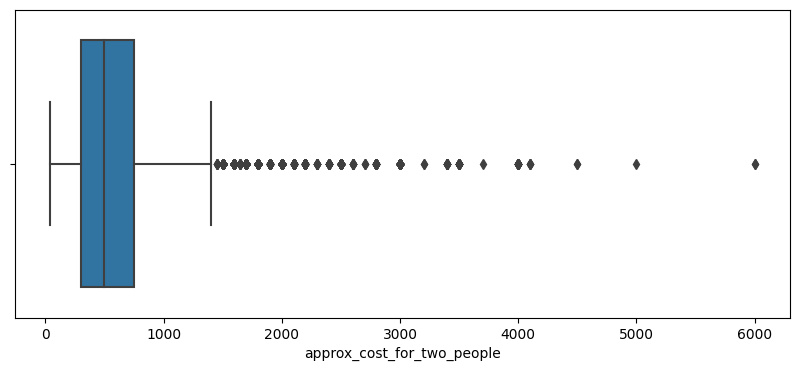

In [30]:
# boxplot for approx_cost_for_two_people feature
plt.figure(figsize=(10, 4))
sns.boxplot(data=df, x = 'approx_cost_for_two_people')
plt.show()

* The approx_cost(for two people) feature exhibits a right-skewed distribution with a mean cost of ₹603.55, suggesting a concentration of lower to mid-range costs among Bangalore's restaurants. However, the presence of higher maximum values indicates diversity in pricing, indicating a wide range of dining options, with most restaurants falling within the mid-price range, while some establishments command higher prices, potentially catering to specific niches or offering premium dining experiences.

### 11 What is the distribution of restaurants in Bangalore by listed_in_type?

In [31]:
list_type_dist = df['listed_in_type'].value_counts().sort_values(ascending=False).head(10)
list_type_dist

Delivery              20410
Dine-out              14058
Desserts               2709
Cafes                  1511
Drinks & nightlife     1038
Buffet                  846
Pubs and bars           630
Name: listed_in_type, dtype: int64

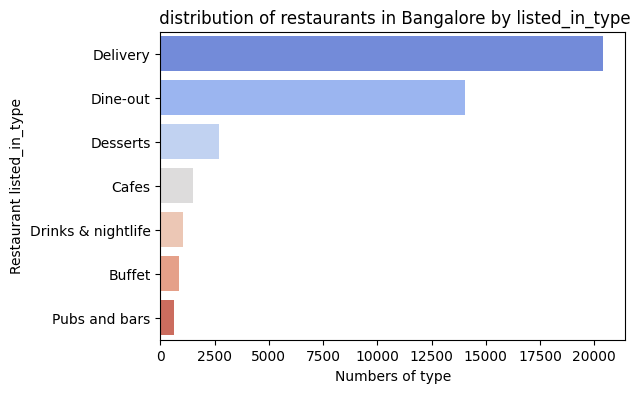

In [32]:
# Barplot chart Reflect the distribution of restaurants in Bangalore by listed_in_type.
plt.figure(figsize=(6, 4))
sns.barplot(y=list_type_dist.index, x=list_type_dist.values, palette='coolwarm')
plt.ylabel('Restaurant listed_in_type')
plt.xlabel('Numbers of type')
plt.title(' distribution of restaurants in Bangalore by listed_in_type')
plt.show()

* The distribution of restaurants among the listed_in_type features indicates that the majority are categorized as "Delivery" with 20,406 establishments, followed by "Dine-out" with 14,050. The data reflects the diverse options available, including dessert places, cafes, and venues for drinks and nightlife, catering to varied preferences in Bangalore.

## - Bivariate analysis:

### 1. What are the top rated restaurants address in Bangalore?

In [33]:
top_rated_address = round(df.groupby("address")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_address

address
26/1, Dr Rajkumar Road, Brigade Gateway Campus, Malleshwaram Bangalore                                   4.90
120 A3, 2nd Floor, Santosh Tower, EPIP Industrial Area, Phase 1, Hoodi Village, Whitefield, Bangalore    4.90
65, Markham Road, Ashok Nagar, Brigade Road, Bangalore                                                   4.90
136, Ground Floor, 1st Cross, 5th Block, Jyoti Niwas College Road, Koramangala 5th Block, Bangalore      4.90
Behind MK Retail, Sarjapur Road, Bangalore                                                               4.90
460, 2nd Cross, Krishna Temple Road, Indiranagar, Bangalore                                              4.90
151, 2nd Cross, Domlur 2nd Stage, Indiranagar, Bangalore                                                 4.90
100 Feet Road, 1st Phase, Near Jayadeva Flyover, 2nd Stage, BTM, Bangalore                               4.90
Ground Floor, Forum Shantiniketan, Whitefield Main Road, Hoodi, Whitefield, Bangalore                    4.83
13

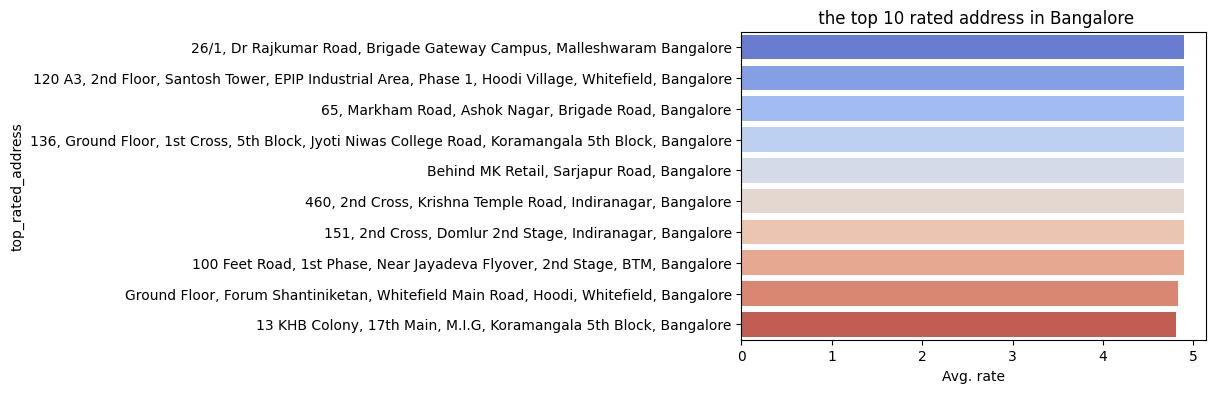

In [34]:
# Barplot chart Reflect the top 10 rated restaurants address in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_address.index, x=top_rated_address.values, palette='coolwarm')
plt.ylabel('top_rated_address')
plt.xlabel('Avg. rate')
plt.title(' the top 10 rated address in Bangalore')
plt.show()

* Highly-rated address in Bangalore, including areas like Malleshwaram, Whitefield, and Koramangala, boast impressive ratings ranging from 4.81 to 4.90. These places contribute to Bangalore's diverse food scene, with the combined ratings highlighting their positive reception among diners.

### 2. What are the top popular or most voted address in Bangalore?

In [35]:
top_voted_address = round(df.groupby(["address"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_address

address
Behind MK Retail, Sarjapur Road, Bangalore                                                                   16588.50
298, Namma Metro Pillar 62, 100 Feet Road, Indiranagar, Bangalore                                            14956.00
28, 4th 'B' Cross, Koramangala 5th Block, Bangalore                                                          14700.60
90/4, 3rd Floor, Outer Ring Road, Munnekollaly Village, Marathahalli, Bangalore                              12121.00
105, 1st A Cross Road, Jyothi Nivas College Road, Koramangala 5th Block, Bangalore                           10498.85
LR Arcade,4121, Old Airport Road, Bangalore                                                                   9164.50
562, 8th Main, Koramangala 4th Block, Bangalore                                                               9077.37
8, 3rd Floor, Allied Grande Plaza, Diagonally Opposite Garuda Mall, Magrath Road, Brigade Road, Bangalore     8396.55
Next to BSNL, HAL 2nd Stage, 80 Feet Road, Indir

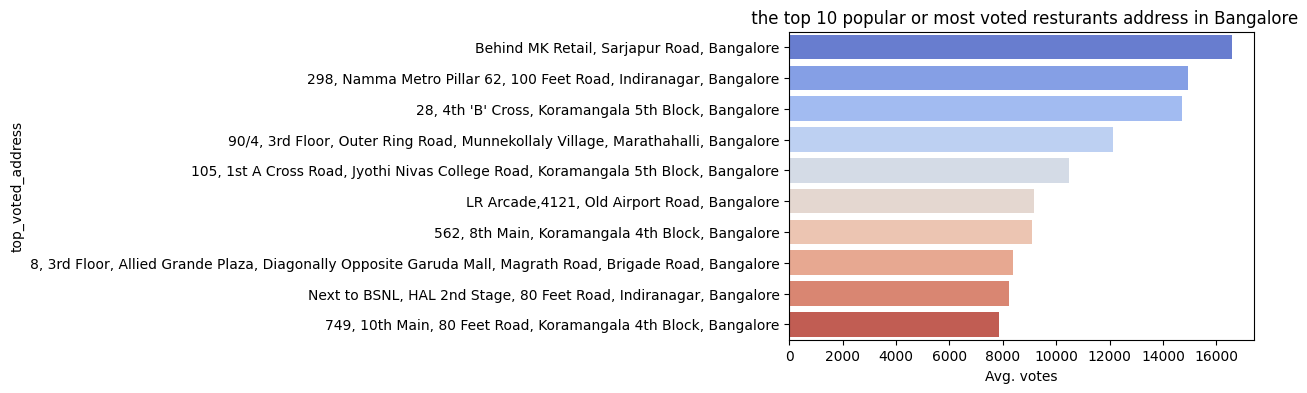

In [36]:
# Barplot chart Reflect the top 10 popular or most voted resturants address in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_address.index, x=top_voted_address, palette='coolwarm')
plt.ylabel('top_voted_address')
plt.xlabel('Avg. votes')
plt.title(' the top 10 popular or most voted resturants address in Bangalore')
plt.show()

* Top-voted locations in Bangalore, such as Sarjapur Road, Indiranagar, and Koramangala, accumulate substantial votes ranging from 7,860.90 to an impressive 16,588.50. These areas showcase a significant engagement from diners, emphasizing their popularity and lively atmosphere in Bangalore's culinary landscape.

---

* When comparing the top-rated and top-voted addresses in Bangalore, some areas consistently appear in both lists, suggesting a correlation between high ratings and popularity. For instance, locations like Sarjapur Road, Indiranagar, and Koramangala are prominent in both categories. This overlap indicates that these areas not only boast highly-rated restaurants but also attract significant engagement from diners, reinforcing their status as key hubs in Bangalore's culinary scene.

### 3.What are the top rated restaurants name in Bangalore?

In [37]:
top_rated_restaurants = round(df.groupby("name")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_restaurants

name
Sante Spa Cuisine                 4.90
Byg Brewski Brewing Company       4.90
Asia Kitchen By Mainland China    4.90
Punjab Grill                      4.87
Belgian Waffle Factory            4.84
O.G. Variar & Sons                4.80
Flechazo                          4.80
The Pizza Bakery                  4.80
AB's - Absolute Barbecues         4.79
Biergarten                        4.77
Name: rate, dtype: float64

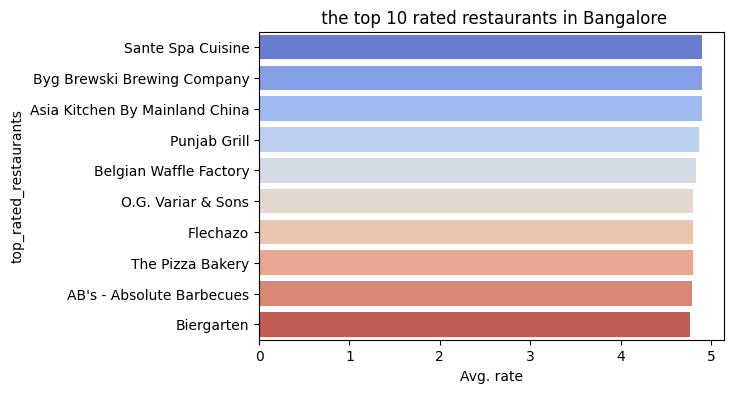

In [38]:
# Barplot chart Reflect the top 10 rated restaurants in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_restaurants.index, x=top_rated_restaurants.values, palette='coolwarm')
plt.ylabel('top_rated_restaurants')
plt.xlabel('Avg. rate')
plt.title(' the top 10 rated restaurants in Bangalore')
plt.show()

* The top-rated restaurants in Bangalore, including Sante Spa Cuisine, Byg Brewski Brewing Company, and Asia Kitchen By Mainland China, boast an outstanding rating of 4.90. 

### 4. What are the top popular or most voted resturants in Bangalore?

In [39]:
top_voted_restaurants = round(df.groupby(["name"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_restaurants

name
Byg Brewski Brewing Company    16588.50
Toit                           14956.00
The Black Pearl                 9562.33
Big Pitcher                     9164.50
Arbor Brewing Company           8396.55
Prost Brew Pub                  7860.90
Church Street Social            7561.73
Hoot                            7257.00
The Hole in the Wall Cafe       7124.88
Truffles                        7001.37
Name: votes, dtype: float64

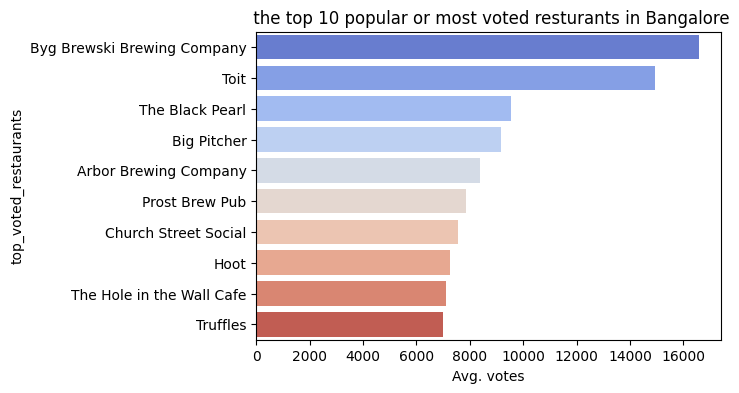

In [40]:
# Barplot chart Reflect the top 10 popular or most voted resturants in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_restaurants.index, x=top_voted_restaurants.values, palette='coolwarm')
plt.ylabel('top_voted_restaurants')
plt.xlabel('Avg. votes')
plt.title(' the top 10 popular or most voted resturants in Bangalore')
plt.show()

* Byg Brewski Brewing Company stands out as the most popular restaurant in Bangalore, boasting both the highest vote count (16,588) and an exceptional rating of 4.90. This reflects its widespread acclaim, making it a prominent choice among locals in Bangalore's vibrant culinary scene.
* We can explore more and found what offer to get all this popularity and high rating

In [41]:
# Exploring other features for Byg Brewski Brewing Company
df[df['name']=='Byg Brewski Brewing Company']

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_two_people,listed_in_type,listed_in_city
3171,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16345,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Delivery,Bellandur
3824,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16345,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Dine-out,Bellandur
3935,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16345,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Drinks & nightlife,Bellandur
39290,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16832,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Delivery,Sarjapur Road
39616,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16832,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Dine-out,Sarjapur Road
39966,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,1,1,4.9,16832,Sarjapur Road,Microbrewery,"Continental, Finger Food, Italian, North India...",1600,Drinks & nightlife,Sarjapur Road


* It can be observed that Byg Brewski Brewing Company offers online ordering and table booking services. Additionally, it provides a diverse cuisine selection, including Continental, North Indian, Italian, South Indian, and Finger Food. Categorized as a Microbrewery, the approximate cost for two is 1600, and it is listed under (Delivery, Dine-out, Drinks & nightlife) types of restaurants. Byg Brewski Brewing Company is situated in two locations in Bangalore, namely Bellandur and Sarjapur Road.

### 5. What is highest rated location in Bangalore?

In [42]:
top_rated_location = round(df.groupby("location")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_location

location
Lavelle Road             4.13
Koramangala 3rd Block    4.01
St. Marks Road           4.00
Koramangala 5th Block    3.99
Church Street            3.97
Sankey Road              3.97
Koramangala 4th Block    3.91
Cunningham Road          3.88
Rajarajeshwari Nagar     3.85
Residency Road           3.85
Name: rate, dtype: float64

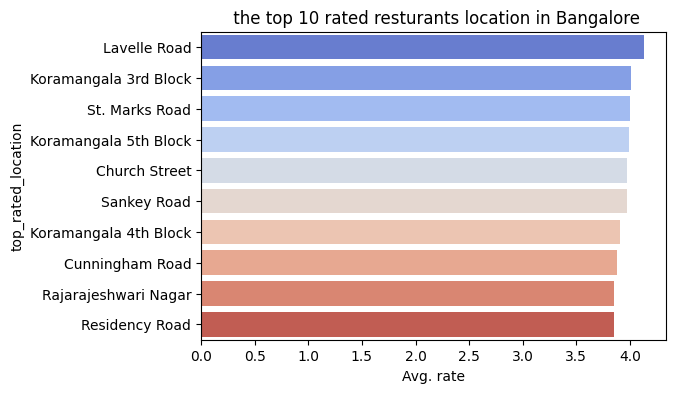

In [43]:
# Barplot chart Reflect the top 10 rated location in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_location.index, x=top_rated_location.values, palette='coolwarm')
plt.ylabel('top_rated_location')
plt.xlabel('Avg. rate')
plt.title(' the top 10 rated resturants location in Bangalore')
plt.show()

* The highest-rated locations in Bangalore based on restaurant ratings are Lavelle Road (4.13), Koramangala 3rd Block (4.01), and St. Marks Road (4.00). These areas showcase a concentration of highly-rated dining establishments that are highly regarded by customers.

### 6. What are the top location with the highest restaurants votes in Bangalore?

In [44]:
top_voted_location = round(df.groupby(["location"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_location

location
Church Street            1087.12
Lavelle Road             1041.55
Koramangala 5th Block     964.74
Koramangala 4th Block     814.69
St. Marks Road            775.80
Koramangala 3rd Block     650.76
Indiranagar               649.53
Cunningham Road           606.48
MG Road                   540.74
Residency Road            483.38
Name: votes, dtype: float64

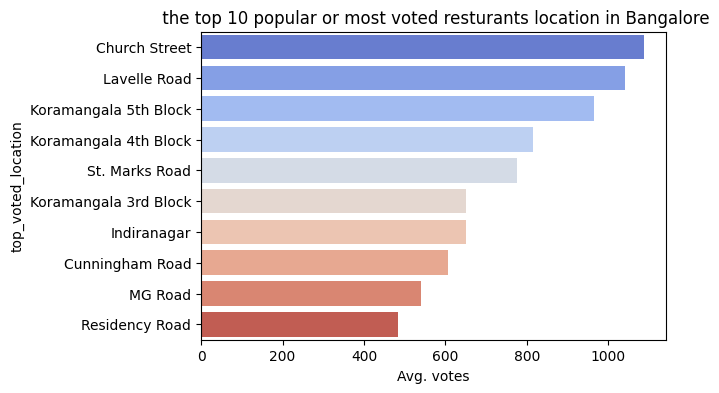

In [45]:
# Barplot chart Reflect the top 10 popular or most voted resturants location in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_location.index, x=top_voted_location.values, palette='coolwarm')
plt.ylabel('top_voted_location')
plt.xlabel('Avg. votes')
plt.title(' the top 10 popular or most voted resturants location in Bangalore')
plt.show()

* The locations with the highest number of votes in Bangalore are Church Street (1087.12), Lavelle Road (1041.55), and Koramangala 5th Block (964.74). These areas attract significant attention and engagement from diners, indicating their popularity and vibrant atmosphere.

* Comparing the locations with the highest number of votes and the top-rated locations in Bangalore, Church Street leads in votes with an average of 1087.12 votes, while it is also among the top-rated locations with a rating of 3.97. Lavelle Road, Koramangala 5th Block, and St. Marks Road consistently rank high in both categories, with notable averages for votes and ratings.

### 7. What is highest rated rest_type in Bangalore?

In [46]:
top_rated_rest_type = round(df.groupby("rest_type")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_rest_type

rest_type
Cafe, Pub                      4.66
Microbrewery                   4.48
Bar, Microbrewery              4.45
Microbrewery, Pub              4.43
Casual Dining, Irani Cafee     4.41
Fine Dining, Lounge            4.40
Casual Dining, Microbrewery    4.35
Fine Dining, Microbrewery      4.30
Bar, Fine Dining               4.21
Cafe, Lounge                   4.19
Name: rate, dtype: float64

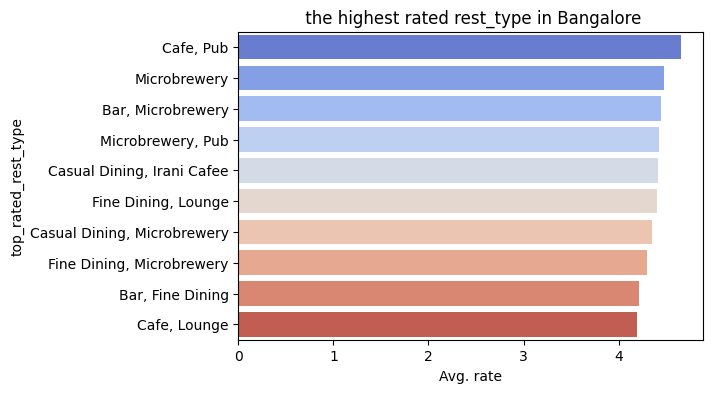

In [47]:
# Barplot chart Reflect the highest rated rest_type in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_rest_type.index, x=top_rated_rest_type.values, palette='coolwarm')
plt.ylabel('top_rated_rest_type')
plt.xlabel('Avg. rate')
plt.title(' the highest rated rest_type in Bangalore')
plt.show()

* Among the highest-rated restaurant types in Bangalore, those classified as "Pub, Cafe" take the lead with an impressive rating of 4.66. "Bar, Pub," "Microbrewery," and combinations like "Microbrewery, Bar" also showcase high ratings, emphasizing the popularity of pubs and microbreweries in the city's culinary scene.

### 8. What are the top rest_type with the highest restaurants votes in Bangalore?

In [48]:
top_voted_rest_type = round(df.groupby(["rest_type"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_rest_type

rest_type
Microbrewery                   6904.04
Microbrewery, Pub              4943.16
Cafe, Pub                      4472.88
Lounge, Microbrewery           3779.20
Casual Dining, Irani Cafee     3686.60
Fine Dining, Lounge            2236.79
Cafe, Casual Dining            1791.87
Casual Dining, Microbrewery    1605.86
Casual Dining, Lounge          1526.89
Club                           1294.08
Name: votes, dtype: float64

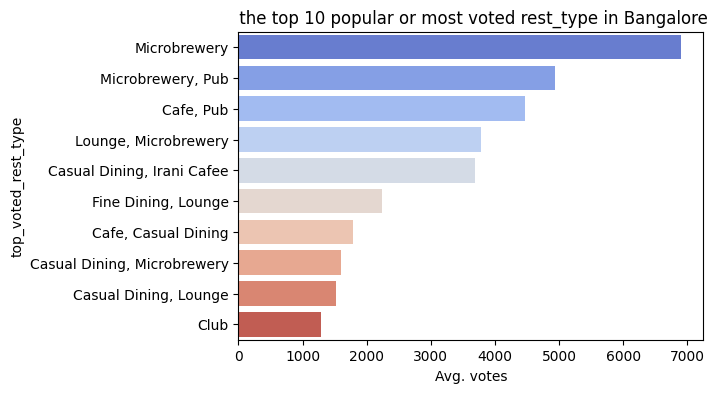

In [49]:
# Barplot chart Reflect the top rest_type with the highest restaurants votes in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_rest_type.index, x=top_voted_rest_type.values, palette='coolwarm')
plt.ylabel('top_voted_rest_type')
plt.xlabel('Avg. votes')
plt.title(' the top 10 popular or most voted rest_type in Bangalore')
plt.show()

* In terms of votes, Microbreweries are notably popular in Bangalore, with "Microbrewery" leading the pack. "Microbrewery, Pub," "Lounge, Microbrewery," and other combinations featuring microbreweries also receive substantial votes, highlighting the city's enthusiasm for these establishments.
----
* When comparing the highest rated and most voted restaurant types in Bangalore, the overlap is apparent in certain categories. Notably, "Microbrewery" stands out in both aspects, with a high average rating of 4.48 and a substantial number of votes, averaging 6904.04. Similarly, "Microbrewery, Pub" and "Pub, Microbrewery" are among the top in both rating and votes, showcasing their popularity and positive reception among diners.

### 9. What is highest rated cuisines in Bangalore?

In [50]:
top_rated_cuisines = round(df.groupby("cuisines")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_cuisines

cuisines
Healthy Food, Mediterranean, Salad                                       4.90
Continental, Finger Food, Italian, North Indian, South Indian            4.90
Asian, Chinese, Momos, Thai                                              4.90
Asian, BBQ, Chinese, Continental, European, Finger Food, North Indian    4.80
Asian, BBQ, Mediterranean, North Indian                                  4.80
American, BBQ, Burger, Mexican, Tex-Mex                                  4.75
Asian, BBQ, Chinese, Continental, European                               4.70
Asian, Burmese                                                           4.70
American, Chinese, Continental, Italian, North Indian                    4.70
Chinese, Japanese, Sushi, Thai                                           4.70
Name: rate, dtype: float64

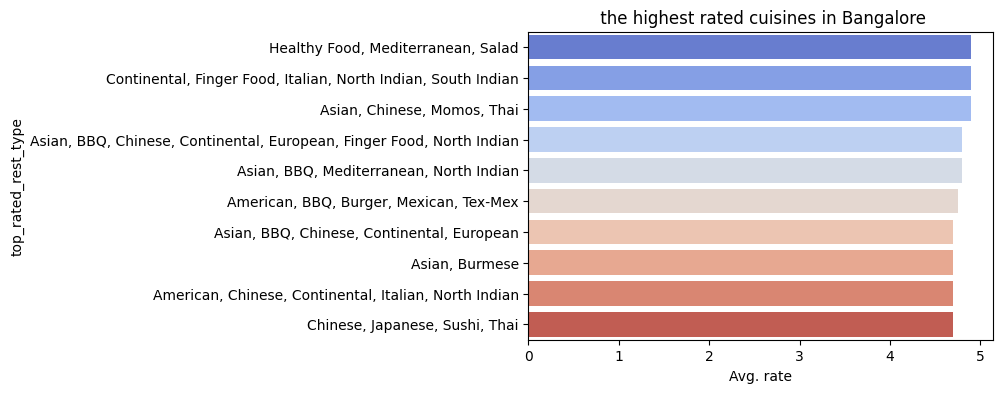

In [51]:
# Barplot chart Reflect the highest rated cuisines in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_cuisines.index, x=top_rated_cuisines.values, palette='coolwarm')
plt.ylabel('top_rated_rest_type')
plt.xlabel('Avg. rate')
plt.title(' the highest rated cuisines in Bangalore')
plt.show()

* Among the highest-rated cuisines in Bangalore, a diverse range is celebrated. Asian, Chinese, Thai, and Momos, as well as Continental, North Indian, Italian, South Indian, and Finger Food, both receive the highest rating of 4.90. Healthy Food, Salad, and Mediterranean dishes also stand out with a perfect rating of 4.90. The variety of cuisines with top ratings underscores the rich and diverse culinary offerings available in Bangalore.

### 10. What are the top cuisines with the highest restaurants votes in Bangalore?

In [52]:
top_voted_cuisines = round(df.groupby(["cuisines"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_cuisines

cuisines
Continental, Finger Food, Italian, North Indian, South Indian    16588.50
American, Italian, Pizza                                         14956.00
American, Continental, Mediterranean, North Indian                9164.50
American, Continental, Salad                                      8379.20
American, Continental, North Indian, Salad                        7860.90
American, Burger, Cafe                                            7124.88
American, Burger, Cafe, Steak                                     7001.37
Asian, BBQ, Chinese, Continental, European                        6986.60
Continental, Mediterranean, Pizza, Salad, Seafood                 6371.85
American, Chinese, Finger Food, Momos, North Indian               6284.73
Name: votes, dtype: float64

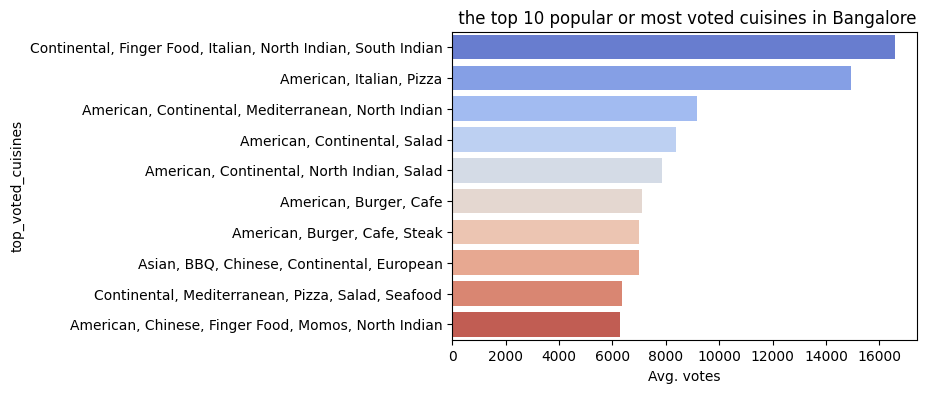

In [53]:
# Barplot chart Reflect the top cuisines with the highest restaurants votes in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_cuisines.index, x=top_voted_cuisines.values, palette='coolwarm')
plt.ylabel('top_voted_cuisines')
plt.xlabel('Avg. votes')
plt.title(' the top 10 popular or most voted cuisines in Bangalore')
plt.show()

* For the cuisines receiving the highest votes in Bangalore, the combination of Continental, North Indian, Italian, South Indian, and Finger Food leads with an impressive vote count of 16,588.50. Italian, American, and Pizza also garnered significant votes with 14,956.00. The list further showcases the diverse preferences, including North Indian, European, Mediterranean, American, Continental, and more, reflecting the city's dynamic culinary landscape.
---
* In comparing the cuisines with the highest ratings and votes in Bangalore, we find that the combination of Continental, North Indian, Italian, South Indian, and Finger Food not only has the highest votes (16,588.50) but also secures a top-tier rating of 4.90. Similarly, cuisines like Italian, American, and Pizza hold significant votes (14,956.00) with a commendable rating of 4.70. This suggests a correlation between high ratings and popularity among diners for certain cuisine types.

### 11. What is highest rated approx_cost_for_two_people in Bangalore?

In [54]:
top_rated_cost = round(df.groupby("approx_cost_for_two_people")['rate'].mean().sort_values(ascending=False).head(10),2)
top_rated_cost

approx_cost_for_two_people
120     4.40
3200    4.40
6000    4.30
1650    4.30
3400    4.30
4500    4.30
5000    4.30
3500    4.29
2700    4.27
1600    4.25
Name: rate, dtype: float64

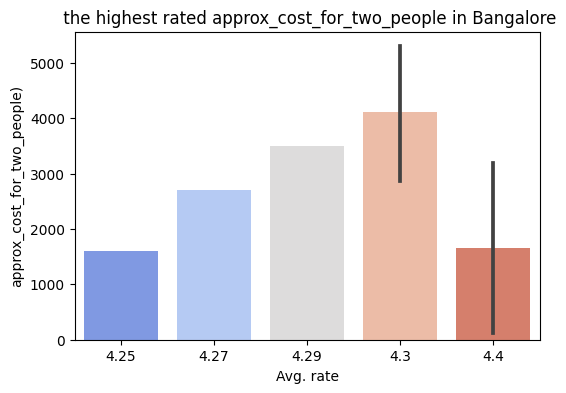

In [55]:
# Barplot chart Reflect the highest rated approx_cost_for_two_people in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_cost.index, x=top_rated_cost.values, palette='coolwarm')
plt.ylabel('approx_cost_for_two_people)')
plt.xlabel('Avg. rate')
plt.title(' the highest rated approx_cost_for_two_people in Bangalore')
plt.show()

* Analyzing the highest-rated approximate cost for two people in Bangalore, we find that restaurants with a cost of 120 and 3200 have the highest rating of 4.40. There is a group of costs, including 6000, 1650, 3400, 4500, 5000, and 3500, which share a rating of 4.30, indicating a consistent satisfaction level across these price points.

### 12. What are the best approx_cost_for_two_people with the highest restaurants votes in Bangalore?

In [56]:
top_voted_cost = round(df.groupby(["approx_cost_for_two_people"])['votes'].mean().sort_values(ascending=False).head(10),2)
top_voted_cost

approx_cost_for_two_people
1600    2567.34
2600    1933.20
1400    1928.76
2400    1672.78
1800    1653.64
1300    1477.94
2100    1463.42
1700    1311.98
1500    1227.58
2500    1163.18
Name: votes, dtype: float64

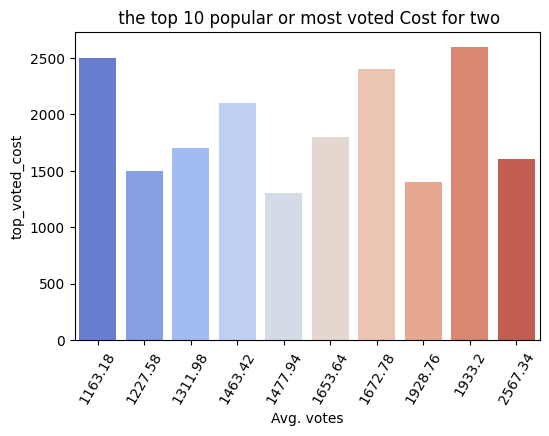

In [57]:
# Barplot chart Reflect the best approx_cost_for_two_people with the highest restaurants votes in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_cost.index, x=top_voted_cost.values, palette='coolwarm')
plt.ylabel('top_voted_cost')
plt.xlabel('Avg. votes')
plt.xticks(rotation=60)
plt.title(' the top 10 popular or most voted Cost for two')
plt.show()

* Examining the highest-voted approximate cost for two people in Bangalore, we observe that restaurants with a cost of 1600 have the highest total votes, indicating popularity. The next highest-voted cost ranges include 2600, 1400, 2400, and 1800. These results suggest that restaurants with these price points attract more attention and engagement from customers.
---
* When comparing the highest-rated and highest-voted approximate cost for two people in Bangalore, we find that restaurants with a cost of 1600 dominate in voted and among top-rated. The second-highest voted cost, 2600, is also among the top-rated costs. This alignment suggests that restaurants with a cost of 1600 not only receive high ratings but also attract a significant number of votes, highlighting their popularity among customers.

### 13. What are the average rated listed_in_type in Bangalore?

In [58]:
top_rated_listed_type = round(df.groupby("listed_in_type")['rate'].mean().sort_values(ascending=False),2)
top_rated_listed_type

listed_in_type
Pubs and bars         4.01
Drinks & nightlife    4.00
Buffet                3.96
Cafes                 3.86
Desserts              3.76
Dine-out              3.67
Delivery              3.63
Name: rate, dtype: float64

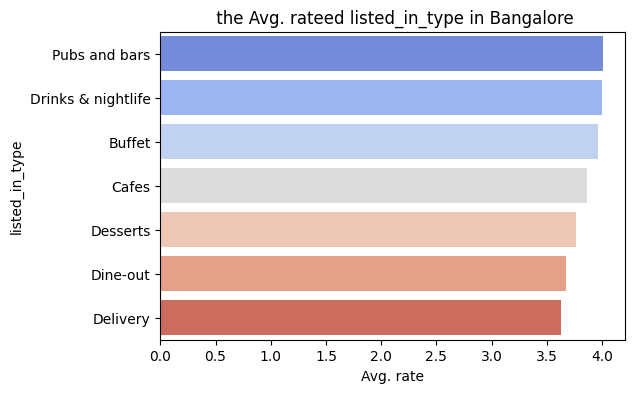

In [59]:
# Barplot chart Reflect the average rate by listed_in_type in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_rated_listed_type.index, x=top_rated_listed_type.values, palette='coolwarm')
plt.ylabel('listed_in_type')
plt.xlabel('Avg. rate')
plt.title(' the Avg. rateed listed_in_type in Bangalore')
plt.show()

* When examining the average ratings for different listed_in_type categories in Bangalore, Pubs and bars lead with an average rating of 4.01, closely followed by Drinks & nightlife at 4.00. Buffet and Cafes also receive high average ratings, indicating positive customer sentiment. On the other hand, Delivery, which includes a wide variety of restaurants, has a slightly lower average rating of 3.63.

### 14. What are the listed_in_type with the highest restaurants votes in Bangalore?

In [60]:
top_voted_listed_type = round(df.groupby(["listed_in_type"])['votes'].mean().sort_values(ascending=False),2)
top_voted_listed_type

listed_in_type
Drinks & nightlife    1201.70
Pubs and bars         1099.85
Buffet                1030.17
Cafes                  543.72
Dine-out               362.47
Delivery               256.53
Desserts               198.21
Name: votes, dtype: float64

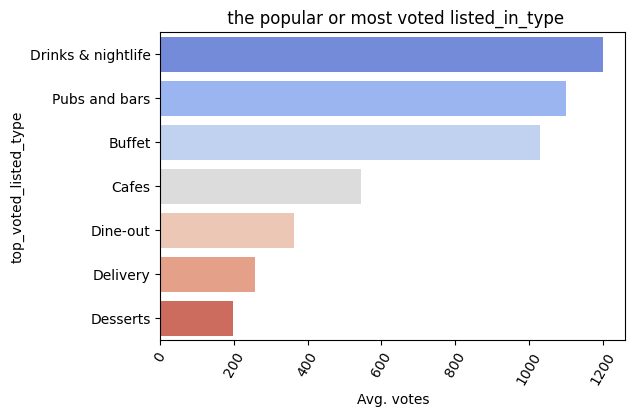

In [61]:
# Barplot chart Reflect the listed_in_type with the highest restaurants votes in Bangalore.
plt.figure(figsize=(6, 4))
sns.barplot(y=top_voted_listed_type.index, x=top_voted_listed_type.values, palette='coolwarm')
plt.ylabel('top_voted_listed_type')
plt.xlabel('Avg. votes')
plt.xticks(rotation=60)
plt.title(' the popular or most voted listed_in_type')
plt.show()

* Exploring the average number of votes for different listed_in_type categories in Bangalore, Drinks & nightlife and Pubs and bars lead with an average of 1201.70 and 1099.85 votes, respectively. Buffet and Cafes also receive a substantial number of votes, indicating their popularity. Dine-out and Delivery have lower average vote counts, reflecting diverse preferences among customers.
---
* Pubs and bars boast the highest rating at 4.01, signaling exceptional customer satisfaction. Meanwhile, Drinks & nightlife takes the lead in popularity, amassing an impressive average of 1201.70 votes. Buffet follows closely with a strong rating of 3.96. Cafes and Desserts maintain moderate ratings at 3.86 and 3.76, respectively. Dine-out and Delivery, although slightly lower, still secure respectable ratings of 3.67 and 3.63. This reveals diverse customer preferences, with some categories excelling in satisfaction while others dominate in popularity.

# ***4. Analysis outcomes or summary:***

## **1. Statistical analysis:** 
   - Explore important numerical and categorical features.
* **First Statistical Description for Numeric Features:** 

    1. **online_order:** Ranges from **0** to **1**, referring to No and Yes. The mean of online order is **0.66**, indicating that **66%** of **41,190** restaurants have online order service. 

    2. **book_table:** Ranges from **0** to **1**, referring to No and Yes. The mean is **0.15**, indicating that **15%** of **41,190** restaurants have a book_table service. 

    3. **rate:** Ranges from **1.80** to **4.90**. The mean rate is **3.68**, and the median is **3.70**. As the mean is slightly less than the median, it reflects that the data is left-skewed, and there are some outliers in the lower rate values.
        
    4. **votes:** Ranges from **0** to **16,832**. The mean votes is **352.07**, and the median is **73**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper votes values.
    
    5. **approx_cost_for_two_people:** Ranges from **40** to **6,000**. The mean price is **603.55**, and the median is **500**.  As the mean is greater than the median, it reflects that the data is right-skewed, and there are outliers in the upper prices values.
    
---

* **Second Statistical Description for Categorical Features:**

    * **Second Statistical Description for Categorical Features:**
    1. **address Feature:** Out of **8,784** restaurant address, the most frequented name is **Delivery Only**, which has **86** values out of total restaurants address.

    2. **name Feature:** Out of **6,574** restaurant names, the most frequented name is **Cafe Coffee Day**, which has **86** branches out of total restaurants names.

    3. **location Feature:** Out of **92** locations, the most frequented location is **BTM**, which has **3,873** restaurants out of the total restaurants.

    4. **rest_type Feature:** Out of **66** rest_types, the most frequented rest_type is **Quick Bites**, which is repeated **13,861** times out of the total.

    5. **cuisines Feature:** Out of **1,688**, the most frequented cuisine is **North Indian**, with **2,284** occurrences out of the total.

    6. **listed_in_type Feature:** Out of **7** listed_in(types), the most frequented is **Delivery**, with **20,406** occurrences out of the total.

    7. **listed_in_city Feature:** Out of **30** listed_in(cities), the most frequented is **BTM**, with **2,578** restaurants in BTM out of the total.

-----------------------------------------------------------------------------------------

## **2. Correlation & Correlation Heatmap:** 
   ## Correlation Analysis Summary

The correlation reveals the relationships between various features in the dataset:

- Restaurants with **table booking** tend to have higher **costs** (strong positive correlation of 0.61).

- **Table booking** is moderately positively correlated with high **ratings** (0.42), suggesting that restaurants allowing table booking are more likely to have higher ratings.

- **Ratings** show a moderate positive correlation with the number of **votes** (0.42), indicating that highly-rated restaurants tend to have more votes & viseversa.

- **Table booking** is moderately positively correlated with **votes** (0.39), suggesting that restaurants allowing table booking are more likely to have higher votes.
  
- Moderate positive correlation (0.38) between Rating **(rate)** and **approx_cost_for_two_people**: Higher-rated restaurants might tend to have a slightly higher cost.
  
- Moderate positive correlation (0.37) between Votes **(votes)** and **approx_cost_for_two_people**: Popular restaurants might have a slightly higher cost.

- **Online ordering** has a weak negative correlation with **costs** (-0.18), indicating a slight tendency that restaurants offering online orders might have lower costs.

These correlations provide valuable insights for further analysis and modeling, helping identify potential predictors of restaurant success.

*Note: Correlation does not imply causation, and these interpretations are based on the observed associations in the data.*

-------------------------------------------------------------------------------------------    
    
## **3. Analysis and visualization around the following questions**
### - Univariate analysis:

**1. What are the top 10 address in Bangalore with the highest concentration of restaurants activity?**        
        
        * The data highlights the busiest restaurant spots in Bangalore. "Delivery Only" tops with 86 occurrence, showing the popularity of food delivery. Upscale locations like The Ritz-Carlton and Conrad Bangalore are popular dining choices, while residential areas like HSR Layout and BTM have vibrant food scenes. Cunningham Road, Thubarahalli in Whitefield, and iconic MG Road with Park Bangalore, Radisson Blu, and Oberoi are also bustling with diverse food options.

**2. What are the 20 largest restaurants or franchise in Bangalore in terms of number of branches or services?**

        * The data reveals the top 20 restaurants in Bangalore with the highest numbers of branches. Cafe Coffee Day leads with 86 branches, followed by Onesta with 85 and Empire Restaurant with 69. This information provides insights into the widespread presence of these popular restaurants in the city.
        
**3. What is the percent of resturant with online order to others?**

        * it's observed that almost 66% of restaurants in Bangalore offer online ordering, while 34.3% of them do not.
        
**4.  What is the percent of resturant offers book_table service in Bangalore?**

        * it is evident that only 15.2% of restaurants in Bangalore offer a table booking service, while 84.8% do not provide this service.
        
**5. what is the mean rate and statistcal discription of the rate features?**

        * The rate feature in the dataset reveals a generally moderate to high level of satisfaction, as indicated by a mean of approximately 3.68 and a standard deviation of around 0.45. The ratings range from 1.8 to 4.9, with a median of 3.7, suggesting a balanced distribution. The data is left-skewed, as the mean is slightly less than the median, and there are outliers in the lower-rated values. Overall, there is a concentration of ratings around the median, reflecting a generally positive sentiment among the restaurants in the dataset.
        
**6. What is the mean votes and statistcal description?**

        * The votes feature exhibits a right-skewed distribution, with a mean of approximately 352.07 and a standard deviation of 883.46. The data ranges from 0 to 16,832 votes, with a median of 73. The concentration of the data is noticeable in the lower quartiles (25% and 50%), suggesting that the majority of restaurants receive relatively fewer votes, while a small number of restaurants experience significantly higher voting activity.
        
**7. What are the top 10 locations in Bangalore with the highest concentration of restaurants activity?**

        * The data reveals the top 10 locations in Bangalore with the highest numbers of restaurants. BTM leads with 3873 establishments, followed by Koramangala 5th Block with 2295 and HSR with 1992. This information highlights the concentration of dining options in these areas.
        
**8. What are the top 10 rest_type in Bangalore?**

        * Bangalore, known for its hectic lifestyle and limited time for cooking, Quick Bites, Casual Dining, and Cafes dominate the restaurant scene, offering convenient options for the busy urban population. Dessert Parlors and Delivery services further cater to the fast-paced life, providing sweet indulgences and on-the-go meals.
        
**9. What are the top 10 cuisines in Bangalore?**

        * The food preferences in Bangalore show a diverse taste, with North Indian and Chinese cuisines being the most popular. South Indian flavors are also well-liked, and the city embraces a variety of dining experiences with its cafes, bakeries, and desserts. Biryani, Fast Food, and Chinese cuisine are particularly loved, adding to the lively food scene in Bangalore.
        
**10. What are the mean approx_cost_for_two_people and statistcal description?**

        * The approx_cost_for_two_people feature exhibits a right-skewed distribution with a mean cost of ₹603.55, suggesting a concentration of lower to mid-range costs among Bangalore's restaurants. However, the presence of higher maximum values indicates diversity in pricing, indicating a wide range of dining options, with most restaurants falling within the mid-price range, while some establishments command higher prices, potentially catering to specific niches or offering premium dining experiences.
        
**11. What is the distribution of restaurants in Bangalore by listed_in_type?**

        * The distribution of restaurants among the listed_in_type features indicates that the majority are categorized as "Delivery" with 20,406 establishments, followed by "Dine-out" with 14,050. The data reflects the diverse options available, including dessert places, cafes, and venues for drinks and nightlife, catering to varied preferences in Bangalore.

### - Bivariate analysis:

**1. What are the top rated restaurants address in Bangalore?**

        * Highly-rated address in Bangalore, including areas like Malleshwaram, Whitefield, and Koramangala, boast impressive ratings ranging from 4.81 to 4.90. These places contribute to Bangalore's diverse food scene, with the combined ratings highlighting their positive reception among diners.

**2. What are the top popular or most voted address in Bangalore?**

        * Top-voted locations in Bangalore, such as Sarjapur Road, Indiranagar, and Koramangala, accumulate substantial votes ranging from 7,860.90 to an impressive 16,588.50. These areas showcase a significant engagement from diners, emphasizing their popularity and lively atmosphere in Bangalore's culinary landscape.
        
        * When comparing the top-rated and top-voted addresses in Bangalore, some areas consistently appear in both lists, suggesting a correlation between high ratings and popularity. For instance, locations like Sarjapur Road, Indiranagar, and Koramangala are prominent in both categories. This overlap indicates that these areas not only boast highly-rated restaurants but also attract significant engagement from diners, reinforcing their status as key hubs in Bangalore's culinary scene.


**3. What are the top rated restaurants name in Bangalore?**

        * The top-rated restaurants in Bangalore, including Sante Spa Cuisine, Byg Brewski Brewing Company, and Asia Kitchen By Mainland China, boast an outstanding rating of 4.90.
        
**4. What are the top popular or most voted resturants in Bangalore?**

        * Byg Brewski Brewing Company stands out as the most popular restaurant in Bangalore, boasting both the highest vote count (16,588) and an exceptional rating of 4.90. This reflects its widespread acclaim, making it a prominent choice among locals in Bangalore's vibrant culinary scene.
        
  - after We explore more to found what it offer to get all this popularity and high rating we found:
  
        * It can be observed that Byg Brewski Brewing Company offers online ordering and table booking services. Additionally, it provides a diverse cuisine selection, including Continental, North Indian, Italian, South Indian, and Finger Food. Categorized as a Microbrewery, the approximate cost for two is 1600, and it is listed under (Delivery, Dine-out, Drinks & nightlife) types of restaurants. Byg Brewski Brewing Company is situated in two locations in Bangalore, namely Bellandur and Sarjapur Road.
        
**5. What is highest rated location in Bangalore?**

        * The highest-rated locations in Bangalore based on restaurant ratings are Lavelle Road (4.13), Koramangala 3rd Block (4.01), and St. Marks Road (4.00). These areas showcase a concentration of highly-rated dining establishments that are highly regarded by customers.
        
**6. What are the top location with the highest restaurants votes in Bangalore?**

        * The locations with the highest number of votes in Bangalore are Church Street (1087.12), Lavelle Road (1041.55), and Koramangala 5th Block (964.74). These areas attract significant attention and engagement from diners, indicating their popularity and vibrant atmosphere.

        * Comparing the locations with the highest number of votes and the top-rated locations in Bangalore, Church Street leads in votes with an average of 1087.12 votes, while it is also among the top-rated locations with a rating of 3.97. Lavelle Road, Koramangala 5th Block, and St. Marks Road consistently rank high in both categories, with notable averages for votes and ratings.
        
**7. What is highest rated rest_type in Bangalore?**

        * Among the highest-rated restaurant types in Bangalore, those classified as "Pub, Cafe" take the lead with an impressive rating of 4.66. "Bar, Pub," "Microbrewery," and combinations like "Microbrewery, Bar" also showcase high ratings, emphasizing the popularity of pubs and microbreweries in the city's culinary scene.
        
**8. What are the top rest_type with the highest restaurants votes in Bangalore?**

        * In terms of votes, Microbreweries are notably popular in Bangalore, with "Microbrewery" leading the pack. "Microbrewery, Pub," "Lounge, Microbrewery," and other combinations featuring microbreweries also receive substantial votes, highlighting the city's enthusiasm for these establishments.

        * When comparing the highest rated and most voted restaurant types in Bangalore, the overlap is apparent in certain categories. Notably, "Microbrewery" stands out in both aspects, with a high average rating of 4.48 and a substantial number of votes, averaging 6904.04. Similarly, "Microbrewery, Pub" and "Pub, Microbrewery" are among the top in both rating and votes, showcasing their popularity and positive reception among diners.
        
**9. What is highest rated cuisines in Bangalore?**

        * Among the highest-rated cuisines in Bangalore, a diverse range is celebrated. Asian, Chinese, Thai, and Momos, as well as Continental, North Indian, Italian, South Indian, and Finger Food, both receive the highest rating of 4.90. Healthy Food, Salad, and Mediterranean dishes also stand out with a perfect rating of 4.90. The variety of cuisines with top ratings underscores the rich and diverse culinary offerings available in Bangalore.
        
**10. What are the top cuisines with the highest restaurants votes in Bangalore?**

        * For the cuisines receiving the highest votes in Bangalore, the combination of Continental, North Indian, Italian, South Indian, and Finger Food leads with an impressive vote count of 16,588.50. Italian, American, and Pizza also garnered significant votes with 14,956.00. The list further showcases the diverse preferences, including North Indian, European, Mediterranean, American, Continental, and more, reflecting the city's dynamic culinary landscape.

        * In comparing the cuisines with the highest ratings and votes in Bangalore, we find that the combination of Continental, North Indian, Italian, South Indian, and Finger Food not only has the highest votes (16,588.50) but also secures a top-tier rating of 4.90. Similarly, cuisines like Italian, American, and Pizza hold significant votes (14,956.00) with a commendable rating of 4.70. This suggests a correlation between high ratings and popularity among diners for certain cuisine types.
        
**11. What is highest rated approx_cost_for_two_people in Bangalore?**

        * Analyzing the highest-rated approximate cost for two people in Bangalore, we find that restaurants with a cost of 120 and 3200 have the highest rating of 4.40. There is a group of costs, including 6000, 1650, 3400, 4500, 5000, and 3500, which share a rating of 4.30, indicating a consistent satisfaction level across these price points.
        
**12. What are the best approx_cost_for_two_people with the highest restaurants votes in Bangalore?**

        * Examining the highest-voted approximate cost for two people in Bangalore, we observe that restaurants with a cost of 1600 have the highest total votes, indicating popularity. The next highest-voted cost ranges include 2600, 1400, 2400, and 1800. These results suggest that restaurants with these price points attract more attention and engagement from customers.

        * When comparing the highest-rated and highest-voted approximate cost for two people in Bangalore, we find that restaurants with a cost of 1600 dominate in voted and among top-rated. The second-highest voted cost, 2600, is also among the top-rated costs. This alignment suggests that restaurants with a cost of 1600 not only receive high ratings but also attract a significant number of votes, highlighting their popularity among customers.
        
**13. What are the average rated listed_in_type in Bangalore?**

        * When examining the average ratings for different listed_in_type categories in Bangalore, Pubs and bars lead with an average rating of 4.01, closely followed by Drinks & nightlife at 4.00. Buffet and Cafes also receive high average ratings, indicating positive customer sentiment. On the other hand, Delivery, which includes a wide variety of restaurants, has a slightly lower average rating of 3.63.
        
**14. What are the listed_in_type with the highest restaurants votes in Bangalore?**

        * Exploring the average number of votes for different listed_in_type categories in Bangalore, Drinks & nightlife and Pubs and bars lead with an average of 1201.70 and 1099.85 votes, respectively. Buffet and Cafes also receive a substantial number of votes, indicating their popularity. Dine-out and Delivery have lower average vote counts, reflecting diverse preferences among customers.

        * Pubs and bars boast the highest rating at 4.01, signaling exceptional customer satisfaction. Meanwhile, Drinks & nightlife takes the lead in popularity, amassing an impressive average of 1201.70 votes. Buffet follows closely with a strong rating of 3.96. Cafes and Desserts maintain moderate ratings at 3.86 and 3.76, respectively. Dine-out and Delivery, although slightly lower, still secure respectable ratings of 3.67 and 3.63. This reveals diverse customer preferences, with some categories excelling in satisfaction while others dominate in popularity.

## Analysis Conclusion:

The analysis of Bangalore's restaurant scene reveals a dynamic and diverse culinary landscape. Quick Bites, Casual Dining, and Cafes dominate, catering to the city's hectic lifestyle. Microbreweries, especially Byg Brewski Brewing Company, stand out with both high ratings and votes, reflecting their popularity. Locations like Church Street and Lavelle Road consistently lead in both ratings and votes. Cuisines such as Asian, Chinese, and Continental showcase Bangalore's rich palate. The average-rated Pubs and bars, along with Drinks & nightlife, are popular, while Delivery caters to diverse preferences. The approx_cost(for two people) aligns with high ratings, with 1600 being the favored cost. The overlap between highly-rated and most-voted categories, notably in areas like Sarjapur Road, Indiranagar, and Koramangala, indicates a correlation between satisfaction and popularity. This offers valuable insights for both diners and restaurateurs in Bangalore, emphasizing the significance of customer satisfaction and strategic marketing in establishing successful restaurants.